<a href="https://colab.research.google.com/drive/1yyTEXhRZc32t6v8OZaldbK4-NsBGYk2A" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Population in Malaysia

The dataset is about the population in Malaysia from 2010-2019. We retrieved the dataset from www.dosm.gov.my and we analysed the dataset find out about the growth of population in Malaysia. We used Python language and various libraries such as mathplotlib, pandas, seaborn and stats model formula API to make sure the analysis can be done.

##Group Members:


##### 1. ADAM WAFII BIN AZUAR (A20EC0003)
##### 2. MUHAMMAD DINIE HAZIM BIN AZALI (A20EC0084)



## Downloading the Dataset


1. Open www.dosm.gov.my.
3. Search for Malaysia Population.
4. Click on the dataset and click Download.


## Uploading dataset



1. Open www.github.com
2. Click on new repositories and name it as 'dataset'.
3. Click on 'Add file' and 'Upload file'.
4. Browse the downloaded excel file.

## Data Preparation and Cleaning

In this section, we cleaned the data by changing the data type, changing the format of the data, replacing some values in the dataset and renaming some columns name.



Importing pandas, seaborn, mathplotlib and statsmodel formula Api and reading the dataset into Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

df = pd.read_excel("https://github.com/drshahizan/Python_EDA/blob/main/Malaysia%20EDA/team%2018/Population_2010-2019e_Malaysia.xlsx?raw=true")
df

,Sex,Age Group,Year,Citizen category,Ethnic,"Population (""000)"
0,Male,0-4,2010,Malaysian citizens,Bumiputera,942.030
1,Male,0-4,2010,Malaysian citizens,Chinese,223.155
2,Male,0-4,2010,Malaysian citizens,Indians,76.216
3,Male,0-4,2010,Malaysian citizens,Others,18.894
4,Male,0-4,2010,Non-Malaysian citizens,NaN,27.892
...,...,...,...,...,...,...
1695,Female,80+,2019e,Malaysian citizens,Bumiputera,105.400
1696,Female,80+,2019e,Malaysian citizens,Chinese,63.300
1697,Female,80+,2019e,Malaysian citizens,Indians,13.500
1698,Female,80+,2019e,Malaysian citizens,Others,0.900


Checking the dataframe info

In [2]:
#Data type checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex                1700 non-null   object 
 1   Age Group          1700 non-null   object 
 2   Year               1700 non-null   object 
 3   Citizen category   1700 non-null   object 
 4   Ethnic             1360 non-null   object 
 5   Population ("000)  1700 non-null   float64
dtypes: float64(1), object(5)
memory usage: 79.8+ KB


Checking Null values in the dataframe

In [3]:
#Null values for each column
df.isna().sum()

Sex                    0
Age Group              0
Year                   0
Citizen category       0
Ethnic               340
Population ("000)      0
dtype: int64

Fill in the Null Values

In [4]:
#Fill the NaN values
df[['Ethnic']] = df[['Ethnic']].fillna('Foreigners')
df

,Sex,Age Group,Year,Citizen category,Ethnic,"Population (""000)"
0,Male,0-4,2010,Malaysian citizens,Bumiputera,942.030
1,Male,0-4,2010,Malaysian citizens,Chinese,223.155
2,Male,0-4,2010,Malaysian citizens,Indians,76.216
3,Male,0-4,2010,Malaysian citizens,Others,18.894
4,Male,0-4,2010,Non-Malaysian citizens,Foreigners,27.892
...,...,...,...,...,...,...
1695,Female,80+,2019e,Malaysian citizens,Bumiputera,105.400
1696,Female,80+,2019e,Malaysian citizens,Chinese,63.300
1697,Female,80+,2019e,Malaysian citizens,Indians,13.500
1698,Female,80+,2019e,Malaysian citizens,Others,0.900


Determine new datatype for Age group and Population and presenting the datatype for each columns

In [5]:
#Change the datatype of certain columns
df["Age Group"] = df['Age Group'].astype('string')
df['Population ("000)'] = df['Population ("000)'].astype('int')
df.dtypes

Sex                  object
Age Group            string
Year                 object
Citizen category     object
Ethnic               object
Population ("000)     int64
dtype: object

Formating the values in Age group column by replacing the values

In [6]:
#Formating some of the value in age group & year
df = df.replace({'Age Group':{'2020-09-05 00:00:00':'5-9'}})
df = df.replace({'Age Group':{'2014-10-01 00:00:00':'10-14'}})
df = df.replace({'Year':{'2019e':'2019'}})

#Change the datatype of year
df['Year'] = df['Year'].astype('int')
df

,Sex,Age Group,Year,Citizen category,Ethnic,"Population (""000)"
0,Male,0-4,2010,Malaysian citizens,Bumiputera,942
1,Male,0-4,2010,Malaysian citizens,Chinese,223
2,Male,0-4,2010,Malaysian citizens,Indians,76
3,Male,0-4,2010,Malaysian citizens,Others,18
4,Male,0-4,2010,Non-Malaysian citizens,Foreigners,27
...,...,...,...,...,...,...
1695,Female,80+,2019,Malaysian citizens,Bumiputera,105
1696,Female,80+,2019,Malaysian citizens,Chinese,63
1697,Female,80+,2019,Malaysian citizens,Indians,13
1698,Female,80+,2019,Malaysian citizens,Others,0


Renaming the Population columns

In [7]:
#Rename population column & multiply all the value with 1000
df['Population ("000)'] = df['Population ("000)']*1000
df = df.rename(columns = {'Population ("000)':'Population'})
df

,Sex,Age Group,Year,Citizen category,Ethnic,Population
0,Male,0-4,2010,Malaysian citizens,Bumiputera,942000
1,Male,0-4,2010,Malaysian citizens,Chinese,223000
2,Male,0-4,2010,Malaysian citizens,Indians,76000
3,Male,0-4,2010,Malaysian citizens,Others,18000
4,Male,0-4,2010,Non-Malaysian citizens,Foreigners,27000
...,...,...,...,...,...,...
1695,Female,80+,2019,Malaysian citizens,Bumiputera,105000
1696,Female,80+,2019,Malaysian citizens,Chinese,63000
1697,Female,80+,2019,Malaysian citizens,Indians,13000
1698,Female,80+,2019,Malaysian citizens,Others,0


## Exploratory Analysis and Visualization

For this section, we will show the analysis of this dataframe using bar plot and KDE plot as our data visulaization.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Calculating the average of Population in Malaysia each year from 2010-2019

In [9]:
#population of Malaysia group by year
population_years = df.groupby('Year').apply(lambda x: x['Population'].mean()).reset_index(name= "Average Malaysia population")
pd.set_option('display.precision',2)
population_years

,Year,Average Malaysia population
0,2010,167647.06
1,2011,170476.47
2,2012,173111.76
3,2013,177311.76
4,2014,180158.82
5,2015,182958.82
6,2016,185635.29
7,2017,187888.24
8,2018,189994.12
9,2019,191241.18


In [10]:
df.describe()

,Year,Population
count,1700.00,1.70e+03
mean,2014.50,1.81e+05
std,2.87,2.52e+05
min,2010.00,0.00e+00
25%,2012.00,1.40e+04
50%,2014.50,7.70e+04
75%,2017.00,2.32e+05
max,2019.00,1.02e+06


Showing the population in Malaysia categorized by age group

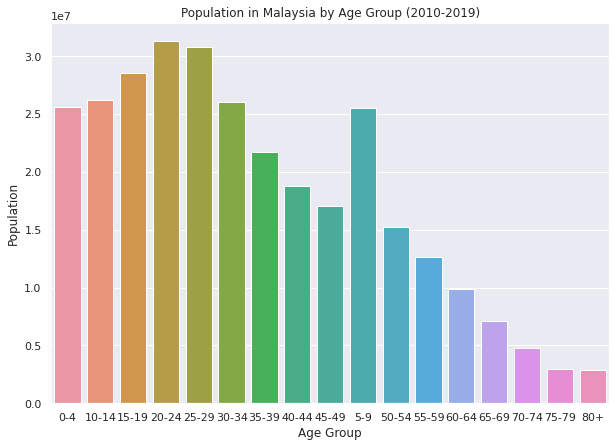

In [11]:
sns.set_theme()
age_group = df.groupby('Age Group').apply(lambda x: x['Population'].sum()).reset_index(name= "population")
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x=age_group['Age Group'], y=age_group['population'])
ax.set(xlabel ="Age Group", ylabel = "Population", title ='Population in Malaysia by Age Group (2010-2019)')
plt.show()

As shown in the bar plot above, the age group of people from the age of 20-24 has highest population throughout the years and the people from the age of 75 and above have the least population throughout the years.

In [12]:
df.groupby('Year').sum()

,Population
Year,
2010,28500000
2011,28981000
2012,29429000
2013,30143000
2014,30627000
2015,31103000
2016,31558000
2017,31941000
2018,32299000


KDE Plot the Probability Density of the Population in Malaysia

Text(0, 0.5, 'Probability Density')

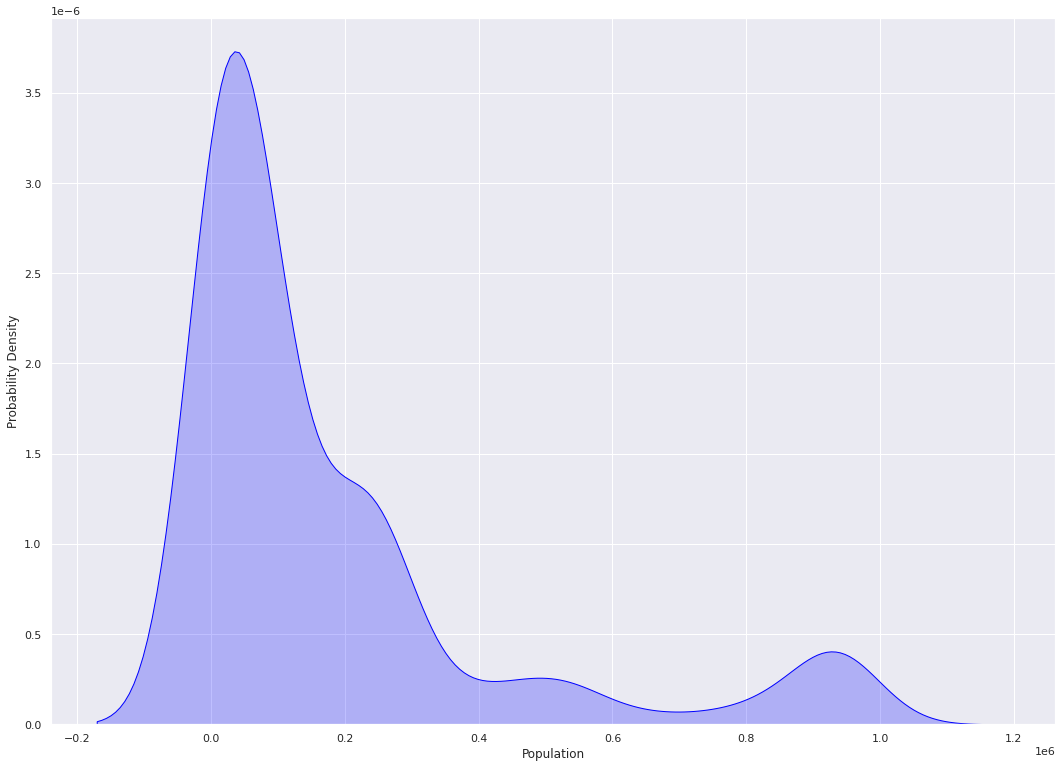

In [13]:
fig, ax = plt.subplots(figsize=(18, 13))
sns.kdeplot(df['Population'],color='blue',shade=True, ax= ax)

# Setting the X and Y Label
plt.xlabel('Population')
plt.ylabel('Probability Density')

At the highest point of this KDE plot shows that the probability density of the population is high and prove that is the most accurate number of population in Malaysia

## Asking and Answering Questions

The questions were asked to make the elaboration of the dataset is easier to understand and comprehend. The visualization helped by answering the questions:



#### Q1: How the population in Malaysia growth by year?

In [14]:
df.groupby("Year")["Population"].sum().sort_values()

Year
2010    28500000
2011    28981000
2012    29429000
2013    30143000
2014    30627000
2015    31103000
2016    31558000
2017    31941000
2018    32299000
2019    32511000
Name: Population, dtype: int64

Text(0.5, 1.0, 'Line Plot of Malaysia population by year')

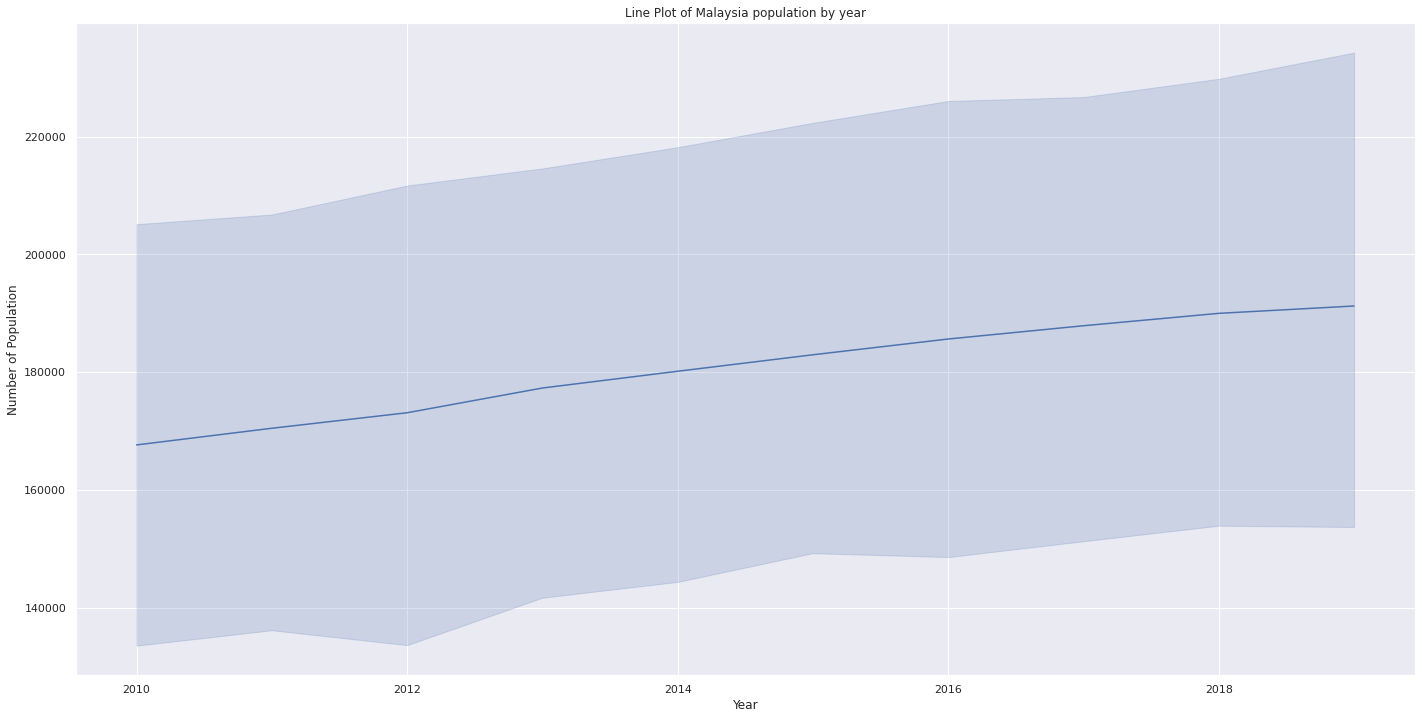

In [15]:
plt.figure(figsize=(24,12))
sns.lineplot(x='Year', y='Population', data=df)
plt.xlabel("Year")
plt.ylabel("Number of Population")
plt.title("Line Plot of Malaysia population by year")

The line plot above proves that each year the population in Malaysia keep increasing from 2010-2019. The reason behind this may be because the birth rate in Malaysia is higher than the death rate.

#### Q2: Which ethnic has the highest population?

In [16]:
df.groupby("Ethnic")["Population"].sum().sort_values()

Ethnic
Others          2508000
Indians        19600000
Foreigners     29240000
Chinese        65707000
Bumiputera    190037000
Name: Population, dtype: int64

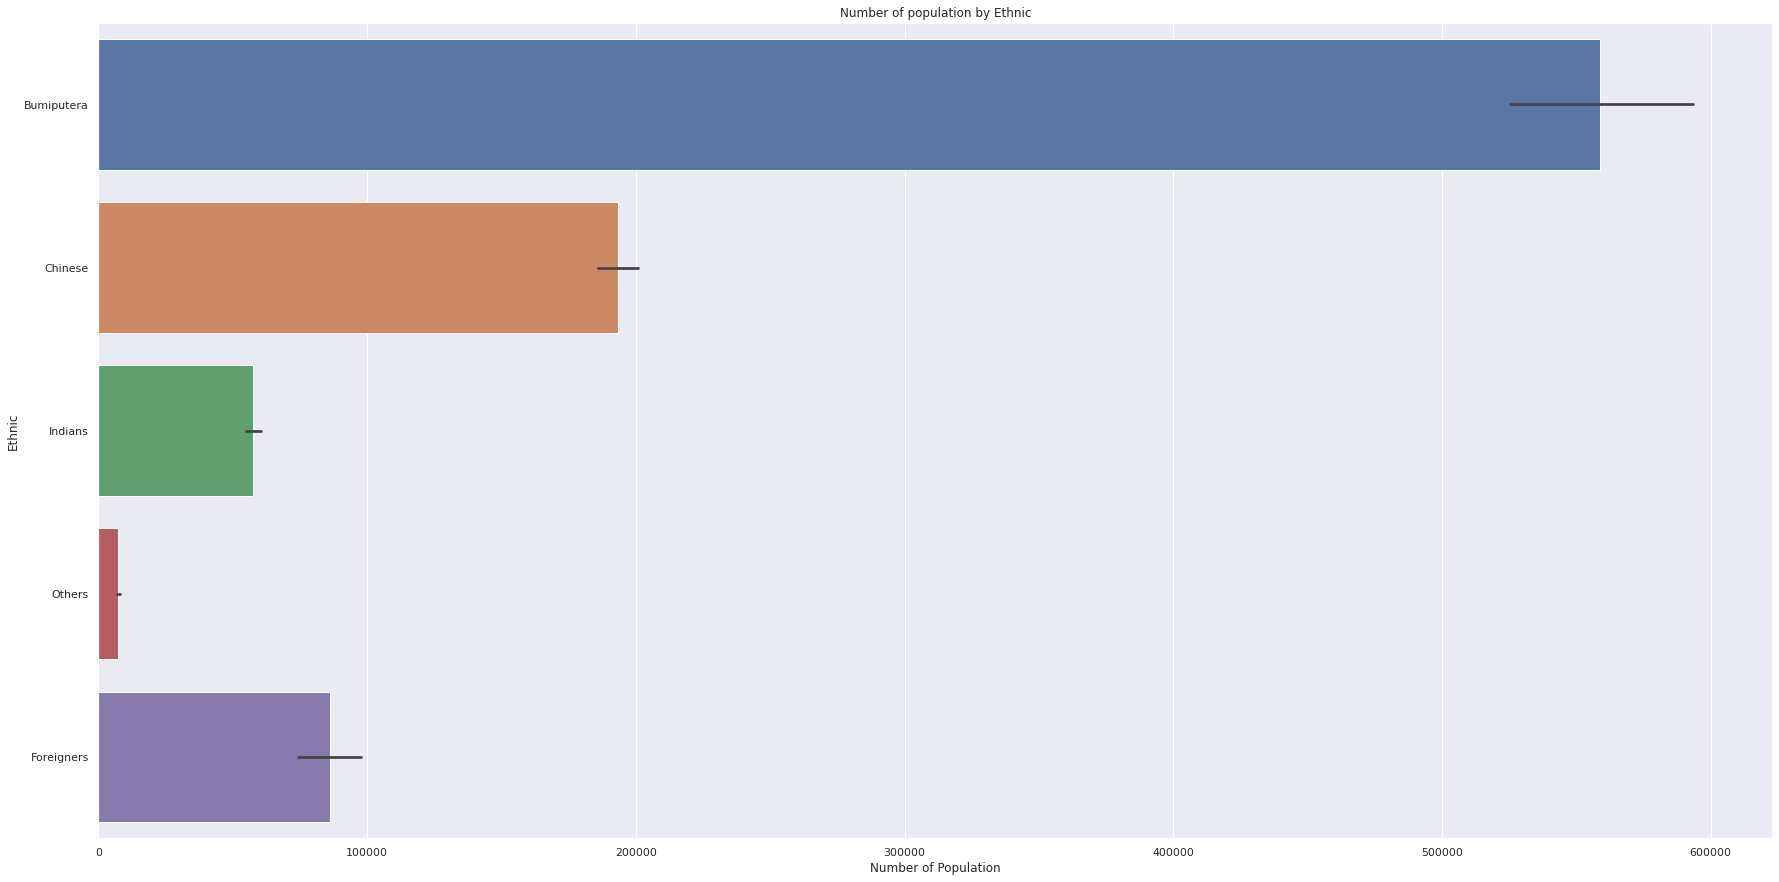

In [17]:
fig, ax = plt.subplots(figsize=(30, 15))
sns.barplot(x='Population', y= 'Ethnic', data=df)
ax.set(xlabel ="Number of Population", ylabel = "Ethnic", title ='Number of population by Ethnic')
plt.show()

As shown in the bar plot above, Bumiputera are the most populated ethnics in Malaysia because there is various races that can be categorized as bumiputere such as malay, sabahan, sarawakian and orang asli.

#### Q3: What is the different of growth between Malaysia citizen and Non-Malaysia citizen?

In [18]:
df1 = df.groupby("Citizen category")["Population"].sum().sort_values()
df1

Citizen category
Non-Malaysian citizens     29240000
Malaysian citizens        277852000
Name: Population, dtype: int64

Text(0.5, 1.0, 'Trend line of number of population by each citizen category')

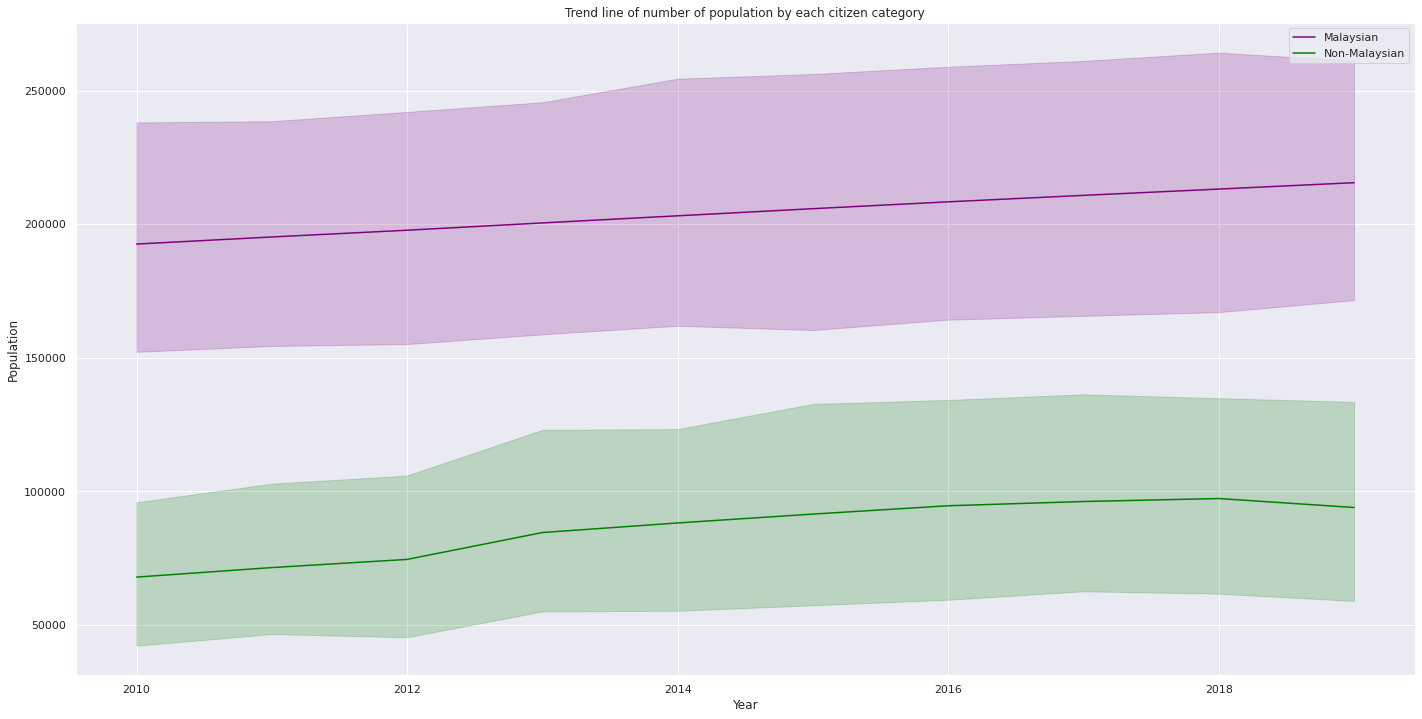

In [19]:
plt.figure(figsize=(24,12))
df1 = df.loc[lambda df: df['Citizen category'] == "Malaysian citizens", ('Population', 'Year')]
df2 = df.loc[lambda df: df['Citizen category'] == "Non-Malaysian citizens", ('Population', 'Year')]
sns.lineplot(x='Year', y='Population', color='purple', data=df1, label ='Malaysian')
sns.lineplot(x='Year', y='Population', color='green', data=df2, label ='Non-Malaysian')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Trend line of number of population by each citizen category")

The Malaysian in Malaysia are always increasing throughout the year. As for non-Malaysian, initially the numbers are increasing until 2018 but in 2019 the population of non-Malaysian in Malaysia decreased but not by much.

#### Q4: Which sex have the highest population in Malaysia for each year?

In [20]:
df.groupby("Sex")["Population"].sum().sort_values()

Sex
Female    148547000
Male      158545000
Name: Population, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


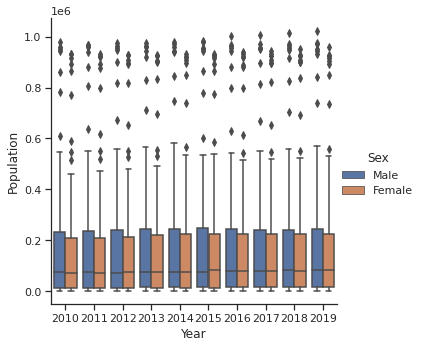

In [21]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Year", "Population", "Sex", data=df, kind="box")
    g.set_axis_labels("Year", "Population");

As we can see from the factor plot above, we can identify the trend that Male will always higher than Female in population in Malaysia from 2010 until 2019.

Text(0.5, 1.0, 'Trend line of population in Malaysia each year')

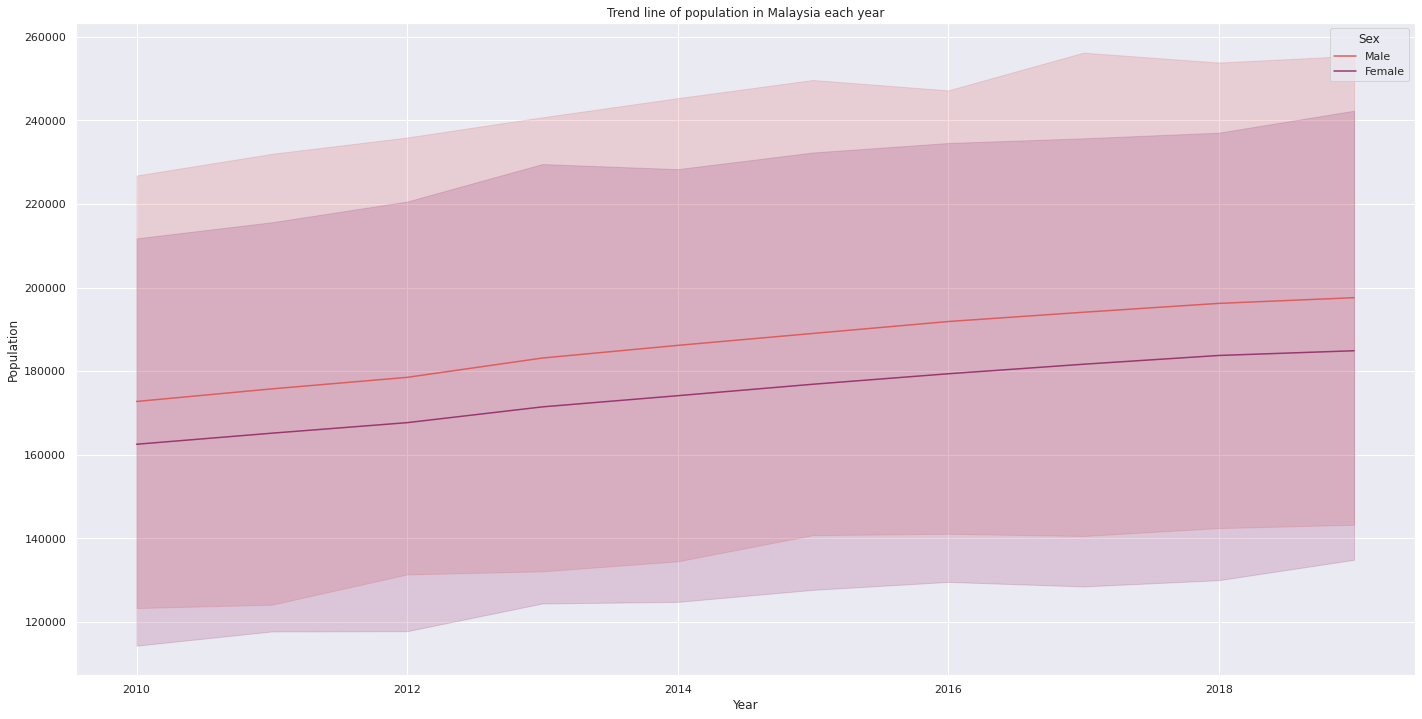

In [22]:
plt.figure(figsize=(24,12))
sns.lineplot(x='Year', y='Population',hue='Sex',palette="flare", data=df)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Trend line of population in Malaysia each year")

The line plot above was built to ensure that the conclusion we have made in factor plot was correct and it is proven that Male has the highest population comparing to Female.

#### Q5: How the growth of age group each year?

Text(0.5, 1.0, 'Trend line of number of population for each age group from each year')

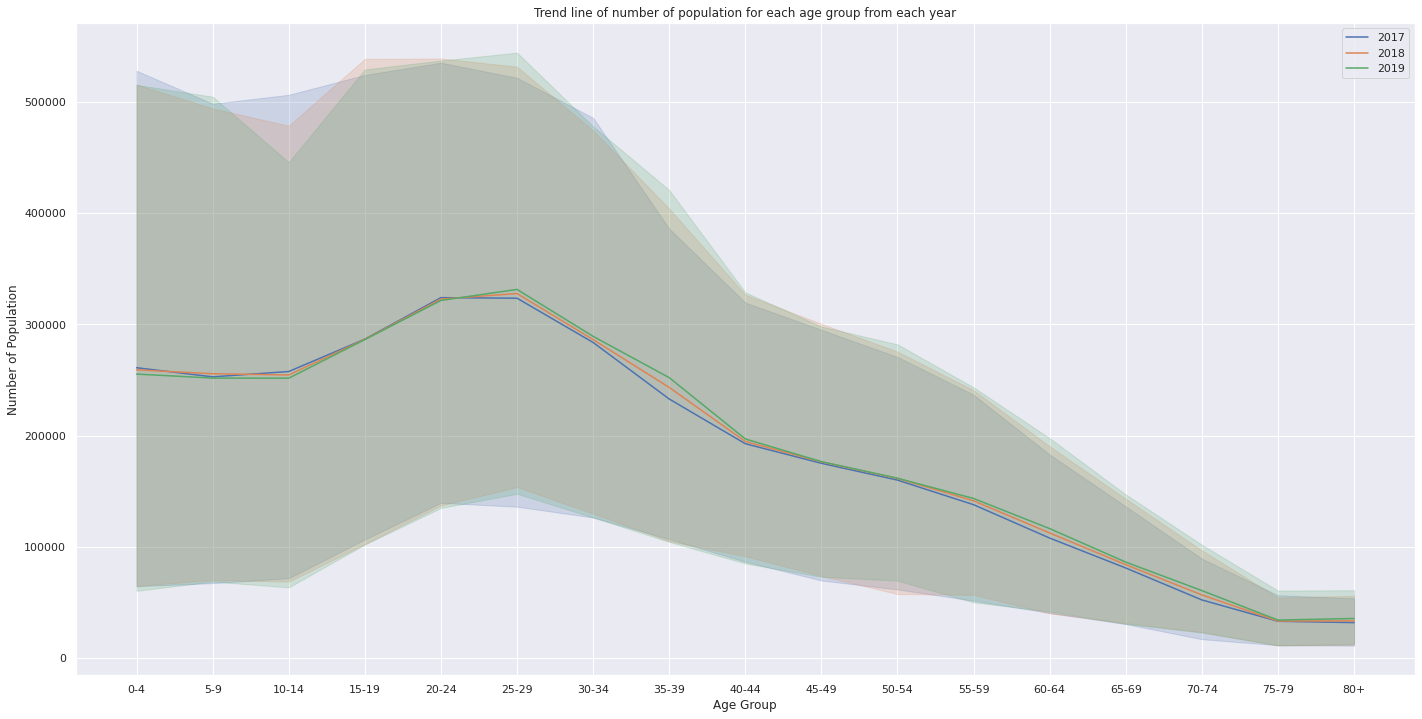

In [23]:
plt.figure(figsize=(24,12))
df1 = df.loc[df.Year ==2017, ('Population', 'Age Group')]
df2 = df.loc[df.Year ==2018, ('Population', 'Age Group')]
df3 = df.loc[df.Year ==2019, ('Population', 'Age Group')]
sns.lineplot(x='Age Group', y='Population', data=df1, label ='2017')
sns.lineplot(x='Age Group', y='Population', data=df2, label ='2018')
sns.lineplot(x='Age Group', y='Population', data=df3, label ='2019')
plt.xlabel("Age Group")
plt.ylabel("Number of Population")
plt.title("Trend line of number of population for each age group from each year")

Looking at the line plot above, we just pick top 3 years that has the highest population. For age group 25 and above, we saw that 2019 has the most population. However, for age group 24 and below, there was uncertainty from those 3 years.

## Inferences and Conclusion

Based on the information provided, it appears that the population in Malaysia has been steadily increasing over the past decade, which may be due to a higher birth rate compared to the death rate. The largest group within the population is Bumiputera, which includes multiple ethnicities. The population of non-Malaysians has also been increasing, although there was a slight decrease in 2019.

In terms of gender, the data suggests that there are more males than females in the population of Malaysia from 2010 to 2019. This trend can also be seen when considering the age group 25 and above, where the population was highest in 2019. For the age group 24 and below, the data is uncertain, but it is likely that the population of males in this age group is also higher than that of females.

Overall, it seems that the population in Malaysia has been consistently growing, with Bumiputera and males making up a significant portion of the population. Further analysis of the data, such as considering other factors that may contribute to population trends, could provide more insight into the demographics of Malaysia.

## References and Future Work

There are several potential projects that could be undertaken using this dataset, depending on the specific research question or objective. Here are a few ideas for potential projects:

 

1.   Analyzing population trends over time: By examining the population data over multiple years, it may be possible to identify trends and patterns in the population growth or decline in Malaysia. This could involve looking at factors such as birth and death rates, migration patterns, and demographic characteristics such as age and gender.
2.   Examining the impact of policy changes on population trends: It may be interesting to explore whether changes in policies or programs, such as those related to healthcare, education, or immigration, have had any impact on the population trends in Malaysia. This could involve comparing population data before and after the implementation of a particular policy or program.
3.   Analyzing the relationship between population trends and economic indicators: It could be valuable to investigate whether there is a relationship between population trends and economic indicators such as GDP, employment rates, or poverty levels in Malaysia. This could help to identify potential drivers of population change and inform policy decisions.

Some useful resources for analyzing population data and conducting demographic research include:


1.   The United Nations Population Division: This organization publishes a wide range of data and research on population trends and demographics globally, including data on fertility, mortality, and migration.
2.   The World Bank: The World Bank provides data and research on a variety of topics related to population, including data on population size, age structure, and urbanization.
3.   The United States Census Bureau: The Census Bureau publishes data and research on population trends and demographics in the United States, including data on population growth, aging, and diversity.
4.   The Population Reference Bureau: This organization conducts research and provides data and analysis on population trends and their implications for policy and decision-making.








